In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kenchi.datasets import load_pima
from kenchi.outlier_detection import *
from kenchi.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
np.random.seed(0)

In [3]:
# Load the Pima Indians diabetes dataset.
X, y = load_pima(return_X_y=True)
X_train, X_test, _, y_test = train_test_split(X, y)

In [4]:
scaler = StandardScaler()

In [5]:
detectors = [FastABOD, OCSVM, MiniBatchKMeans, LOF, KNN, IForest, PCA, KDE]

/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


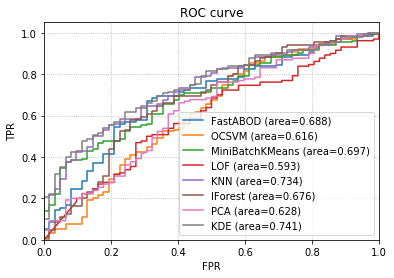

In [6]:
# Get the current Axes instance
ax = plt.gca()

for Detector in detectors:
    det = Detector()

    if hasattr(det, 'novelty'):
        det.set_params(novelty=True)

    # Fit the model according to the given training data
    pipeline = make_pipeline(scaler, det).fit(X_train)

    # Plot the Receiver Operating Characteristic (ROC) curve
    pipeline.plot_roc_curve(X_test, y_test, ax=ax)

# Display the figure
plt.show()